# Reporte EDA

## Imports y Carga de DF's

In [ ]:
# Imports
import pandas as pd 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_samples, silhouette_score
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
import re
import urllib
from sklearn.svm import SVR
from matplotlib import image as mpimg


In [179]:
# Carga datasets
customers_dataset = pd.read_csv('dataset/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('dataset/olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_payments_dataset = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('dataset/olist_orders_dataset.csv')
products_dataset = pd.read_csv('dataset/olist_products_dataset.csv')
sellers_dataset = pd.read_csv('dataset/olist_sellers_dataset.csv')

df_list = [customers_dataset, geolocation_dataset, order_items_dataset, order_payments_dataset, order_reviews_dataset, orders_dataset, products_dataset, sellers_dataset]
names_list = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers']


In [180]:
# Entradas y columnaas
print("Customers Dataset: ", customers_dataset.shape)
print("Geolocation Dataset: ", geolocation_dataset.shape)
print("Order Items Dataset: ", order_items_dataset.shape)
print("Order Payments Dataset: ", order_payments_dataset.shape)
print("Order Reviews Dataset: ", order_reviews_dataset.shape)
print("Orders Dataset: ", orders_dataset.shape)
print("Products Dataset: ", products_dataset.shape)
print("Sellers Dataset: ", sellers_dataset.shape)

Customers Dataset:  (99441, 5)
Geolocation Dataset:  (1000163, 5)
Order Items Dataset:  (112650, 7)
Order Payments Dataset:  (103886, 5)
Order Reviews Dataset:  (99224, 7)
Orders Dataset:  (99441, 8)
Products Dataset:  (32951, 9)
Sellers Dataset:  (3095, 4)


## Calidad de Datos, Overview y Limpieza

### Columnas Duplicadas y Valores Faltantes

Para evaluar la calidad de los datos y realizar la limpieza, primero vamos a definir una funcion de utilidad para resumir brevemente cada uno de los DF's con los que estaremos trabajando

In [181]:
def summarize_dataframes(df_list, names_list):

    all_summaries = []
    
    # Para cada DF
    for df, name in zip(df_list, names_list):
        # Para cada columna del DF
        for col in df.columns:
            # Cantidad / porcentaje de valores nulos
            null_qty = df[col].isnull().sum()
            null_pct = null_qty / len(df) * 100

            # Tipo
            dtype = df[col].dtype

            # Cantidad de Entradas Unicas
            cat_qty = df[col].nunique()

            # Agregar informacion al summary
            all_summaries.append({
                'dataset': name,
                'feature': col,
                'null_qty': null_qty,
                'null_pct': null_pct,
                'type': dtype,
                'cat_qty': cat_qty
            })
    
    summary_df = pd.DataFrame(all_summaries)
    return summary_df

summarize_dataframes(df_list, names_list)

,dataset,feature,null_qty,null_pct,type,cat_qty
0,customers,customer_id,0,0.000000,object,99441
1,customers,customer_unique_id,0,0.000000,object,96096
2,customers,customer_zip_code_prefix,0,0.000000,int64,14994
3,customers,customer_city,0,0.000000,object,4119
4,customers,customer_state,0,0.000000,object,27
5,geolocation,geolocation_zip_code_prefix,0,0.000000,int64,19015
6,geolocation,geolocation_lat,0,0.000000,float64,717360
7,geolocation,geolocation_lng,0,0.000000,float64,717613
8,geolocation,geolocation_city,0,0.000000,object,8011
9,geolocation,geolocation_state,0,0.000000,object,27


A primera vista, tenemos algunas columnas con una alta cantidad de valores nulos. Sin embargo, entre ellas encontramos algunas como 'Review Comment Title' o 'Review Comment Message' donde tiene sentido que tengan una alta cantidad de valores nulos y estos nos proveen informacion. En este caso, vamos a transformar las variables a 'has_title' y 'has_comment' para poder utilizar esta informacion. En los demas casos, podemos simplemente eliminar los valores nulos al ser una parte poco significativa del dataset.

In [182]:
# Eliminamos columnas con valores nulos para las ordenes
orders_dataset = orders_dataset.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# Eliminamos columnas con valores nulos para productos
products_dataset = products_dataset.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm',
                                                   'product_height_cm', 'product_width_cm'])

# Transformacion de variables
order_reviews_dataset['has_title'] = order_reviews_dataset['review_comment_title'].notna()
order_reviews_dataset['has_comment'] = order_reviews_dataset['review_comment_message'].notna()

order_reviews_dataset = order_reviews_dataset.drop(columns=['review_comment_title', 'review_comment_message'])

df_list = [customers_dataset, geolocation_dataset, order_items_dataset, order_payments_dataset, order_reviews_dataset, orders_dataset, products_dataset, sellers_dataset]

summarize_dataframes(df_list, names_list)

,dataset,feature,null_qty,null_pct,type,cat_qty
0,customers,customer_id,0,0.0,object,99441
1,customers,customer_unique_id,0,0.0,object,96096
2,customers,customer_zip_code_prefix,0,0.0,int64,14994
3,customers,customer_city,0,0.0,object,4119
4,customers,customer_state,0,0.0,object,27
5,geolocation,geolocation_zip_code_prefix,0,0.0,int64,19015
6,geolocation,geolocation_lat,0,0.0,float64,717360
7,geolocation,geolocation_lng,0,0.0,float64,717613
8,geolocation,geolocation_city,0,0.0,object,8011
9,geolocation,geolocation_state,0,0.0,object,27


Luego de limpiar los valores nulos, vamos a eliminar filas duplicadas en cada uno de los dataframes

In [183]:
print("Customers Dataset: ", customers_dataset.shape)
print("Geolocation Dataset: ", geolocation_dataset.shape)
print("Order Items Dataset: ", order_items_dataset.shape)
print("Order Payments Dataset: ", order_payments_dataset.shape)
print("Order Reviews Dataset: ", order_reviews_dataset.shape)
print("Orders Dataset: ", orders_dataset.shape)
print("Products Dataset: ", products_dataset.shape)
print("Sellers Dataset: ", sellers_dataset.shape)

Customers Dataset:  (99441, 5)
Geolocation Dataset:  (1000163, 5)
Order Items Dataset:  (112650, 7)
Order Payments Dataset:  (103886, 5)
Order Reviews Dataset:  (99224, 7)
Orders Dataset:  (96461, 8)
Products Dataset:  (32340, 9)
Sellers Dataset:  (3095, 4)


### Customers

In [184]:
customers_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Este dataframe nos da informacion sobre los clientes, nos provee un Zip Code, Ciudad y Estado. Esto se puede utilizar para tener estadisticas sobre demograficas o calculos relacionados al envio (como distancia de envio, o envios que se tardan mas en ciertas ciudades)

### Geolocations

In [185]:
geolocation_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


Este dataset nos da mas detalles sobre los prefijos del zip code, nos provee informacion especifica sobre la latitud y longitud. Utilizando esta informacion, podemos estimar distancias de envio por ejemplo.

### Order Items

In [186]:
order_items_dataset.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Este dataset nos da detalles sobre algunas ordenes, nos indica los productos que se compraron al igual que el vendedor el precio y el costo del envio. Vale la pena recalcar que aqui los datos de 'freight value' van relacionados a las ordenes como tal y no es por productos individuales.

### Order Payments

In [187]:
order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Este dataframe nos provee informacion sobre los pagos de cada una de las ordenes, esta informacion puede ser util para identificar los metodos de pago comunmente utilizados (talvez por categoria o precio de producto)

### Order Reviews

In [188]:
order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,has_title,has_comment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,False,False
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,False,False
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,False,False
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,False,True
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53,False,True
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,2018-04-13 00:00:00,2018-04-16 00:39:37,False,False
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,2017-07-16 00:00:00,2017-07-18 19:30:34,False,False
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,2018-08-14 00:00:00,2018-08-14 21:36:06,False,False
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,2017-05-17 00:00:00,2017-05-18 12:05:37,False,False
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,2018-05-22 00:00:00,2018-05-23 16:45:47,True,True


Este dataframe nos da informacion sobre los reviews, adicionalmente nos indica si la persona dejo un titulo o un comentario sobre el review.

### Orders

In [189]:
orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00


Este dataset nos da informacion sobre las ordenes, nos da una fecha de llegada estimada y real. Ademas, tenemos una columna que nos da el estado de la orden. Para este proyecto, unicamente queremos trabajar utilizando ordenes entregadas.

In [190]:
delivered_count = (orders_dataset['order_status'] == 'delivered').sum()
print("Delivered orders:", delivered_count)
print("Total Orders:", len(orders_dataset))

Delivered orders: 96455
Total Orders: 96461


Existen pocas ordenes no marcadas como entregadas, de todos modos las vamos a remover.

In [191]:
orders_dataset = orders_dataset[orders_dataset['order_status'] == 'delivered'].copy()
delivered_count = (orders_dataset['order_status'] == 'delivered').sum()
print("Delivered orders:", delivered_count)
print("Total Orders:", len(orders_dataset))

Delivered orders: 96455
Total Orders: 96455


### Products

In [192]:
products_dataset.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


Este DF nos da informacion sobre las dimensiones y categoria del producto, por lo que nos es sumamente util. Sin embargo, los nombres de las categorias estan en Portugues, por lo que vamos a reemplazarlos por las traducciones al Ingles.

In [193]:
translation_dataset = pd.read_csv("dataset/product_category_name_translation.csv")

merged_translation = pd.merge(
    products_dataset,
    translation_dataset,
    on = 'product_category_name',
    how='left'
)

merged_translation.drop(columns=['product_category_name'], inplace = True)
merged_translation.rename(columns={'product_category_name_english' : 'product_category_name'}, inplace = True)

products_dataset = merged_translation.copy()

products_dataset.head(10)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


### Sellers

In [194]:
sellers_dataset.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


Esta informacino es similar a la proporcionada sobre los clientes, nos ayuda a evaluar distancias de envio y algunos trends por localidad (ej. cantidad de sellers por ciudad)

## Resúmenes Estadisticos

### Customers

In [195]:
customers_dataset['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

La mayoria de clientes se encuentra concentrado en el estado de Sao Paulo, RJ o MG. Esto nos indica que las areas populares son un pilar bastante importante para el comercio de Olist

In [196]:
customers_dataset['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

Realizando el mismo analisis anterior en cuanto a ciudades, confirmamos que las grandes ciudades albergan bastantes clientes. Sin embargo, al existir una discrepancia bastante grande entre 'estado de Sao Paulo' y 'ciudad de Sao Paulo' nos podemos dar cuenta que las personas que viven a las afueras de las ciudades tambien son un segmento bastante significativo de la clientela.

### Order Payments

In [197]:
order_payments_dataset['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

La gran mayoria de clientes prefiere pagar con una tarjeta de credito, seguido por un boleto (deposito bancario). Esto es un resultado esperado de un e-commerce

In [198]:
order_payments_dataset['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

Al analizar los pagos a plazos, nos damos cuenta que este opcion es bastante comun entre los clientes de Olist. Esto nos puede indicar que varios de los productos ofrecidos se perciben como compras significativas

In [199]:
order_payments_dataset['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

### Order Reviews

In [200]:
order_reviews_dataset['review_score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

La mayoria de reviews son positivas, con la media siendo de 4.08 y el 50% siendo de 5. Esto indica que la mayoria de clientes dejan un review luego de una experiencia positiva. 

### Products

In [201]:
products_dataset['product_category_name'].value_counts()

product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 71, dtype: int64

En cuanto a la distribucion de productos, nos podemos dar cuenta que algunas categorias son poco significativas. La discepancia entre las categorias mas populares y las menos populares es considerable.

### Sellers

In [202]:
sellers_dataset['seller_city'].value_counts()

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

Similar a la tabla de clientes, la mayoria de vendedores se encuentran en la ciudad de Sao Paulo

In [203]:
sellers_dataset['seller_state'].value_counts()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

## Visualización de patrones clave

### Cuales son las ciudades con mas clientes?

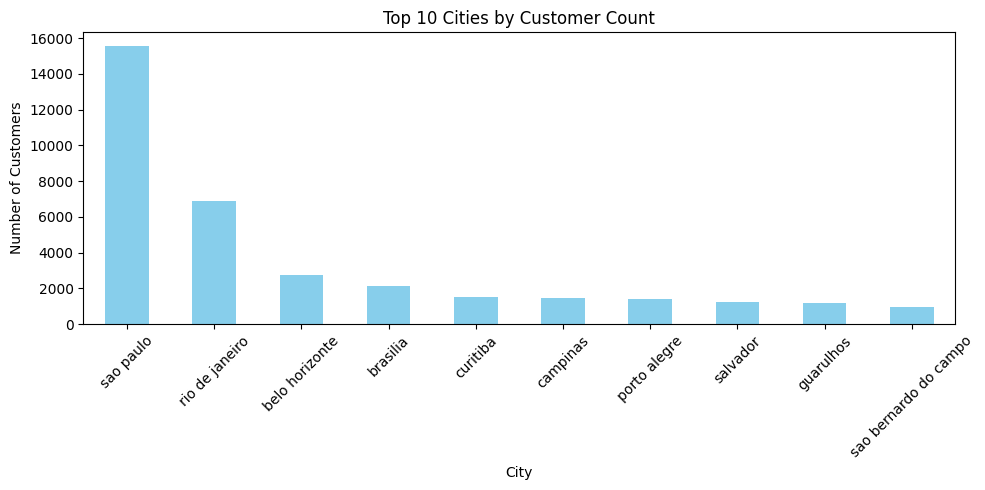

In [204]:
city_counts = customers_dataset['customer_city'].value_counts().head(10)

city_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Al ver la grafica, podemos observar que la distribucion de clientes por ciudad es bastante 'top heavy', es decir, las ciudades grandes albergan la mayoria de clientes. En especial Sao Paulo y Rio de Janeiro

### Como ha variado la cantidad de ordenes por mes?

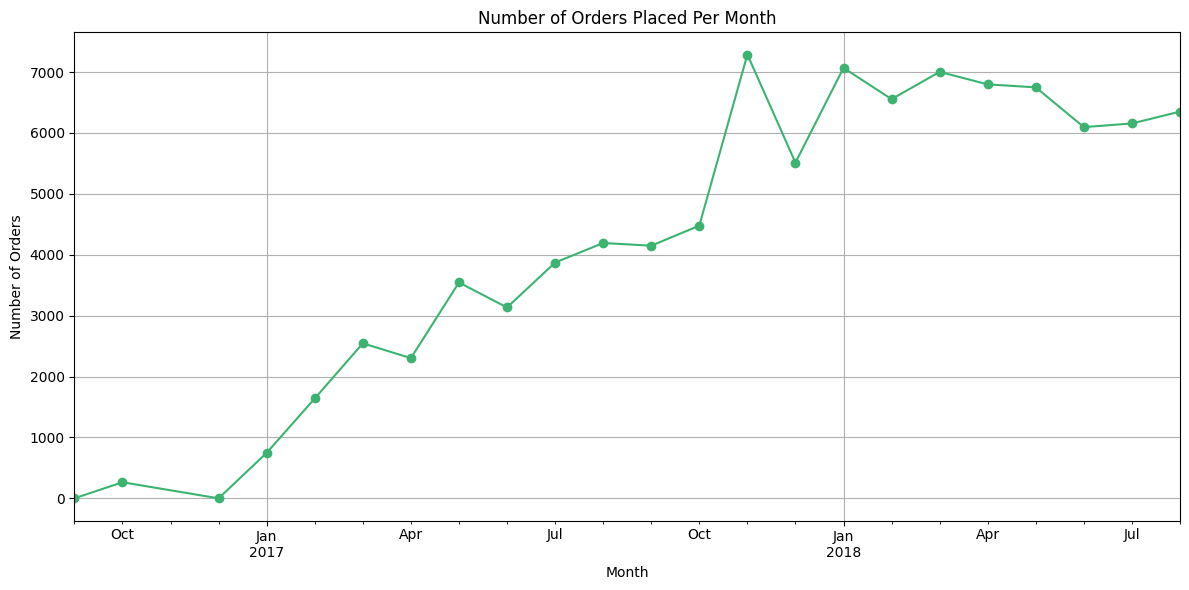

In [205]:
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])

monthly_orders = orders_dataset['order_purchase_timestamp'].dt.to_period('M').value_counts().sort_index()

monthly_orders.plot(kind='line', marker='o', figsize=(12, 6), color='mediumseagreen')
plt.title('Number of Orders Placed Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

En la grafica podemos observar como ha cambiado la cantidad de ordenes realizadas por mes, aumentando significativamente indicando crecimiento. Esto nos indica que el crecimiento ha sucedido de manera rapida, pudiendo causar algunas faltas en la infraestructura.

### Cuales son las categorias mas populares de productos?

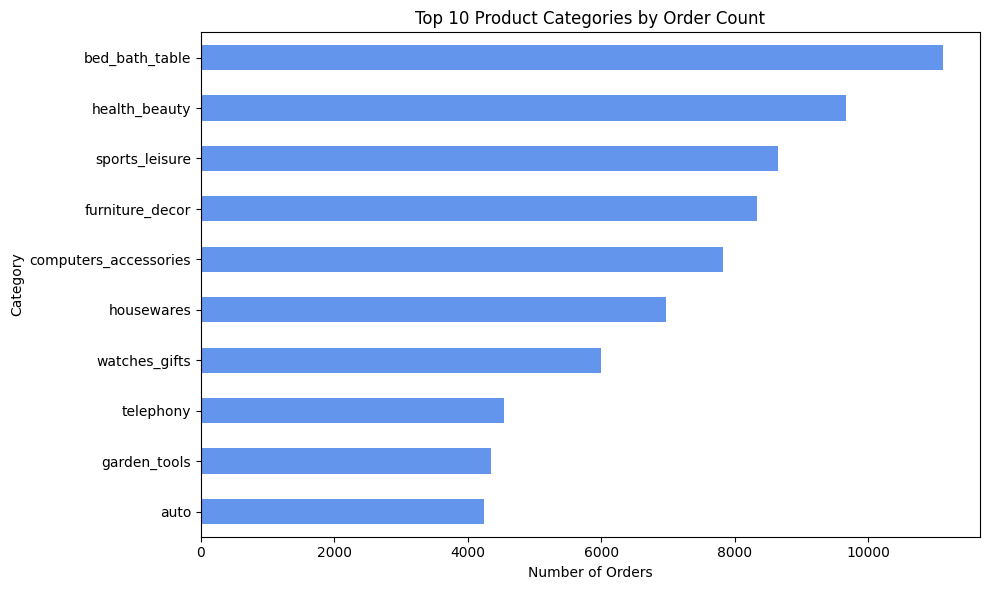

In [206]:
merged = order_items_dataset.merge(products_dataset, on='product_id')
category_counts = merged['product_category_name'].value_counts().head(10)

category_counts.plot(kind='barh', figsize=(10, 6), color='cornflowerblue')
plt.title('Top 10 Product Categories by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Entre las categorias mas populares encontramos productos de cuidado personal, deportes, muebles, accesorios de computadora etc. Esto nos da una mejor idea sobre que tipo de productos estan consumiendo los clientes de Olist

### Que porcentaje de ordenes llegan tarde?

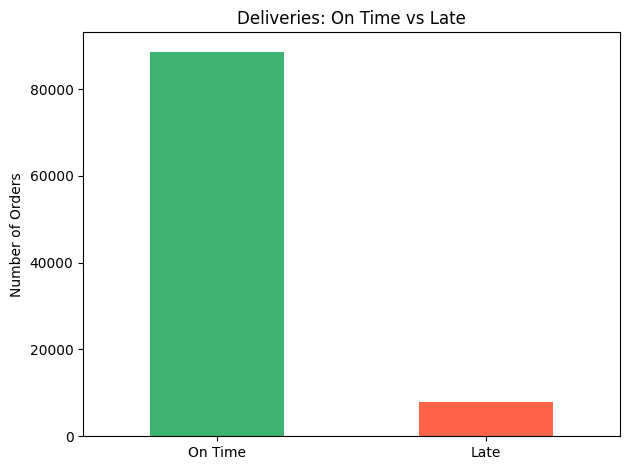

In [207]:
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])

delivered = orders_dataset.dropna(subset=['order_estimated_delivery_date', 'order_delivered_customer_date'])

delivered['delivery_late'] = delivered['order_delivered_customer_date'] > delivered['order_estimated_delivery_date']

on_time_counts = delivered['delivery_late'].value_counts()
on_time_counts.index = ['On Time', 'Late']

on_time_counts.plot(kind='bar', color=['mediumseagreen', 'tomato'])
plt.title('Deliveries: On Time vs Late')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


La gran mayoria de pedidos llegan a tiempo, indicando que las estimaciones realizadas son bastante precisas. Esto va acorde con un analisis estadistico de Reviews, donde la mayoria de clientes tuvieron una experiencia positiva en Olist.

### Que % del revenue viene de los vendedores mas populares?

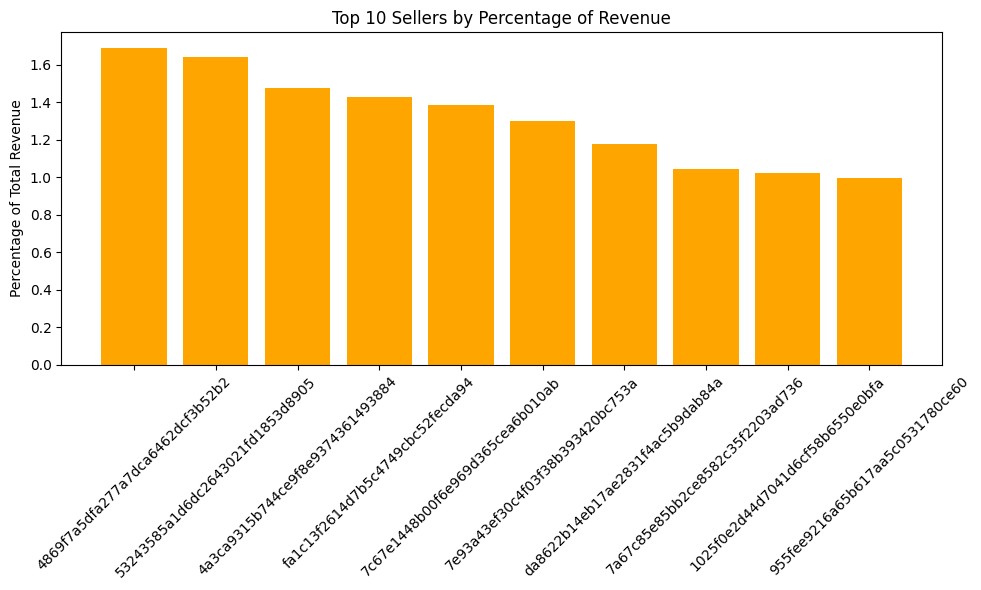

In [208]:
seller_revenue = order_items_dataset.groupby('seller_id')['price'].sum().reset_index()

total_revenue = seller_revenue['price'].sum()

seller_revenue['revenue_percentage'] = (seller_revenue['price'] / total_revenue) * 100

seller_revenue_sorted = seller_revenue.sort_values('revenue_percentage', ascending=False)

top_sellers_percentage = seller_revenue_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_sellers_percentage['seller_id'], top_sellers_percentage['revenue_percentage'], color='orange')
plt.title('Top 10 Sellers by Percentage of Revenue')
plt.ylabel('Percentage of Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Esta grafica tiene como objetivo visualizar la popularidad de los vendedores mas populares, al unicamente contar con un ID de vendedor se hizo como % del revenue total. Gracias a la grafica, nos podemos dar cuenta que los vendedores mas populares representan un monto significativo del revenue de Olist, indicando que posiblemente los clientes de Olist tengan alguna 'lealtad' hacia los vendedores con los que han comprado previamente.

### Cuanto se tardan en llegar los productos por ciudad?

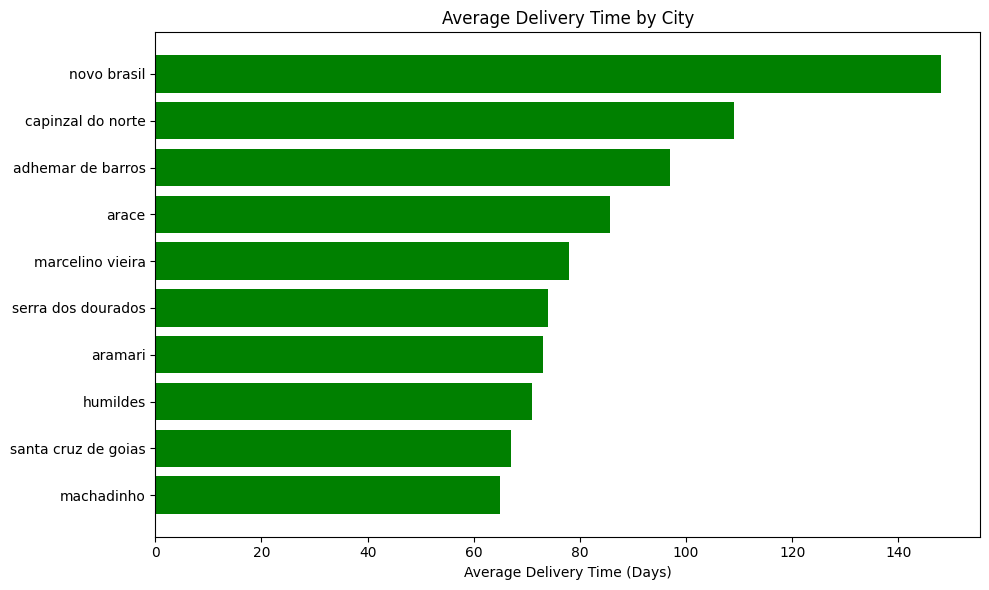

In [209]:
merged_df = pd.merge(orders_dataset, customers_dataset, on='customer_id', how='left')

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])

merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

city_avg_delivery_time = merged_df.groupby('customer_city')['delivery_time'].mean().reset_index()

city_avg_delivery_time = city_avg_delivery_time.sort_values('delivery_time', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(city_avg_delivery_time['customer_city'], city_avg_delivery_time['delivery_time'], color='green')
plt.title('Average Delivery Time by City')
plt.xlabel('Average Delivery Time (Days)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Algunas ciudades tienen tiempos promedio de llegada sumamente altos, esto tambien se puede dar porque haya pocos pedidos (posiblemente 1 o 2 que nos esten dando datos extremos). Tambien nos indica posibles areas de mejora, donde puede ser que la ciudad tenga mucho que ver con el tiempo estimado de pedidos.

## Transformacion de Variables

Para esta seccion vamos a modificar el dataset de ordenes, esto con la finalidad de tener datos mas faciles de procesar. Vamos a agregar algunas columnas para indicar si la orden tuvo algun retraso, al igual que el tiempo que tomo el delivery en dias. De esta manera evitamos computar algunos de los valores como sucedio en la seccion anterior.

In [210]:
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])

orders_dataset['delivery_time_days'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_purchase_timestamp']).dt.days

orders_dataset['delivery_delayed'] = (orders_dataset['order_delivered_customer_date'] > orders_dataset['order_estimated_delivery_date']).astype(int)

Ya con esto, adicional a las tranformacinoes realizadas en la seccion de limpieza nuestros datos se encuentran listos para el modelado.

## Análisis de correlación de características

Para esta seccion vamos a realizar algunos joins de los DF's, no lo realizamos anteriormente ya que teniamos pendientes transformaciones u algunas otras modificaciones que resultaban mejor hacerlas de manera individual de cada DF.

### Rating
Primero, vamos a evaluar ciertas caracteristicas que se pueden relacionar con el rating de los productos. Estas pueden ser
- Cantidad de items en la compra
- Valor de la compra
- Tiempo de delivery
- Ciudad del cliente

In [211]:
items = order_items_dataset.groupby('order_id').agg({
    'freight_value': 'sum',
    'order_item_id': 'count'
}).reset_index().rename(columns={'order_item_id': 'number_of_items'})

payments = order_payments_dataset.groupby('order_id')['payment_value'].sum().reset_index(name='total_payment')

reviews = order_reviews_dataset.groupby('order_id')['review_score'].mean().reset_index()

orders_base = orders_dataset[['order_id', 'customer_id', 'delivery_time_days']]
customers_base = customers_dataset[['customer_id', 'customer_city']]

df = orders_base \
    .merge(customers_base, on='customer_id', how='left') \
    .merge(items, on='order_id', how='left') \
    .merge(payments, on='order_id', how='left') \
    .merge(reviews, on='order_id', how='left')

df_clean = df.dropna()


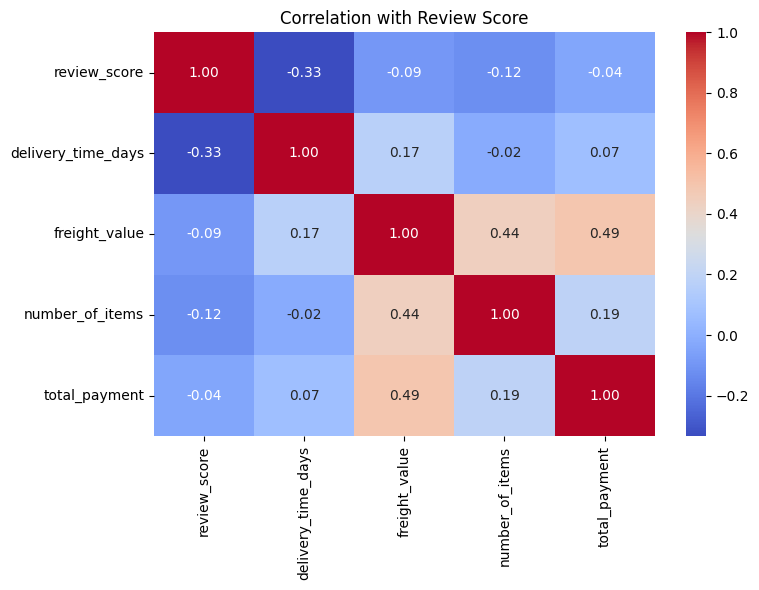

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_clean[['review_score', 'delivery_time_days', 'freight_value', 'number_of_items', 'total_payment']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Review Score')
plt.tight_layout()
plt.show()

Realmente no parecce existir alguna variable que se correlacione fuertemente con los reviews. Unicamente la durecino del delivery, este tiene una correlcion negativa pero esto es de esperarse ya que a un menor delivery time hay un review mas alto.

### Delivery Time
Por ultimo, vamos a evaluar algunas caracteristicas que pueden impactar la duracion del delivery.

In [213]:
merged_df = pd.merge(orders_dataset, order_items_dataset, on='order_id', how='inner')

merged_df = pd.merge(merged_df, products_dataset, on='product_id', how='left')

merged_df = pd.merge(merged_df, sellers_dataset, on='seller_id', how='left')

merged_df = pd.merge(merged_df, customers_dataset, on='customer_id', how='left')


In [214]:

merged_df['product_volume_cm3'] = (
    merged_df['product_length_cm'] * 
    merged_df['product_height_cm'] * 
    merged_df['product_width_cm']
)


merged_df['different_states'] = (merged_df['customer_state'] != merged_df['seller_state']).astype(int)


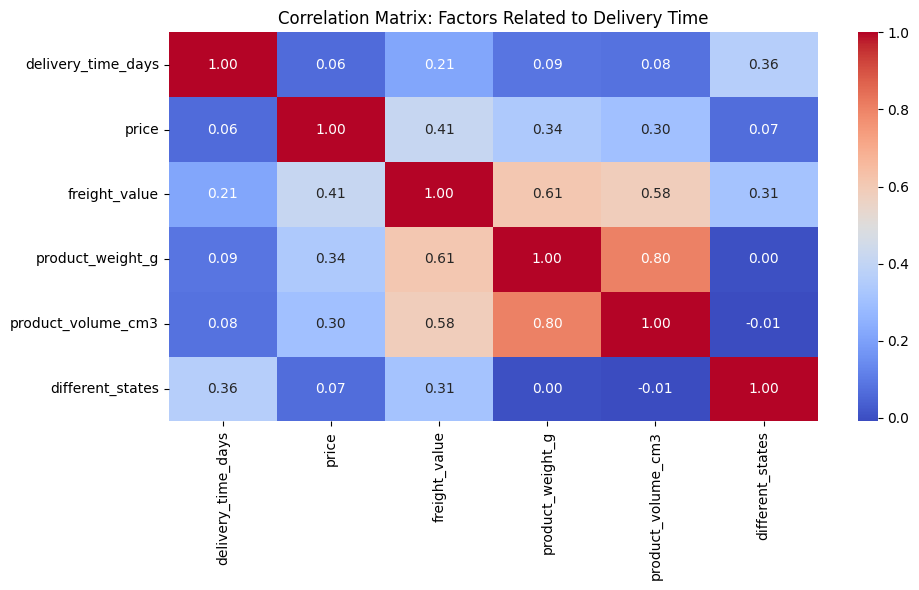

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = merged_df[[
    'delivery_time_days',
    'price',
    'freight_value',
    'product_weight_g',
    'product_volume_cm3',
    'different_states'
]]

corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Factors Related to Delivery Time')
plt.tight_layout()
plt.show()


La unica variable que parece correlacionarse con el tiempo de delivery parece ser si el cliente se encuentra en estados diferentes, esto nos indica que algunas de las variables que incluimos pueden no ser utiles para nuestro objetivo. Adicionalmente, nos lleva a la conclusion que la distancia puede llegar a ser el principal factor en cuanto a duracion del delivery.

## Conclusiones
- Los datos se encuentran listos para el modelado.
- Logramos responder algunas preguntas clave para entender de una mejor manera el negocio de Olist.
- La mayoria de las correlaciones esperadas no se lograron identificar, indicando que posiblemente haya otras relaciones por explorar.

# Reporte Técnico (segunda entrega) 

## Implementación de todos los modelos de regresión 

## ¿Qué factores predicen mejor un retraso en la entrega? 

### Delivery_days vs. freight_value

El objetivo de incluir esta regresion es evaluar si con freight value es posible explicar los dias de entrega, aún asi evaluaremos si es viable 


In [216]:
# Convertir fechas a tipo datetime
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])

# Crear variable delivery_days
orders_dataset['delivery_days'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_purchase_timestamp']).dt.days

# Unir orders con order_items
datar1 = pd.merge(orders_dataset, order_items_dataset, on='order_id', how='inner')
# Unir con customers
datar1 = pd.merge(datar1, customers_dataset[['customer_id', 'customer_state', 'customer_zip_code_prefix']], on='customer_id', how='left')

# Unir con sellers
datar1 = pd.merge(datar1, sellers_dataset[['seller_id', 'seller_state', 'seller_zip_code_prefix']], on='seller_id', how='left')

# Unir con products
datar1 = pd.merge(datar1, products_dataset[['product_id', 'product_category_name', 'product_weight_g']], on='product_id', how='left')

# Unir con payments
datar1 = pd.merge(datar1, order_payments_dataset[['order_id', 'payment_type', 'payment_installments', 'payment_value']], on='order_id', how='left')

# Unir con reviews
datar1 = pd.merge(datar1, order_reviews_dataset[['order_id', 'review_score']], on='order_id', how='left')


In [217]:
# Crear variable nueva de distancia aproximado
geo_avg = geolocation_dataset.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

# Coordenadas del cliente
datar1 = pd.merge(datar1, geo_avg, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
datar1.rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'}, inplace=True)

# Coordenadas del vendedor
datar1 = pd.merge(datar1, geo_avg, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
datar1.rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'}, inplace=True)


In [218]:
# Generacion de distancia 

def haversine(lat1, lon1, lat2, lon2):
    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Fórmula Haversine
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Radio de la Tierra en km
    return km

# Calcular distancia
datar1['distance'] = haversine(datar1['customer_lat'], datar1['customer_lng'], datar1['seller_lat'], datar1['seller_lng'])

#limpieza de datos
# Nos quedamos con las variables clave
reg_data = datar1[['delivery_days', 'freight_value', 'distance', 'price', 'product_weight_g']]

# Eliminamos registros con valores nulos
reg_data = reg_data.dropna()



Resultados Regresión Lineal Simple (freight_value ➜ delivery_days):
MAE  = 6.08 días
RMSE = 9.25 días
R²   = 0.0462


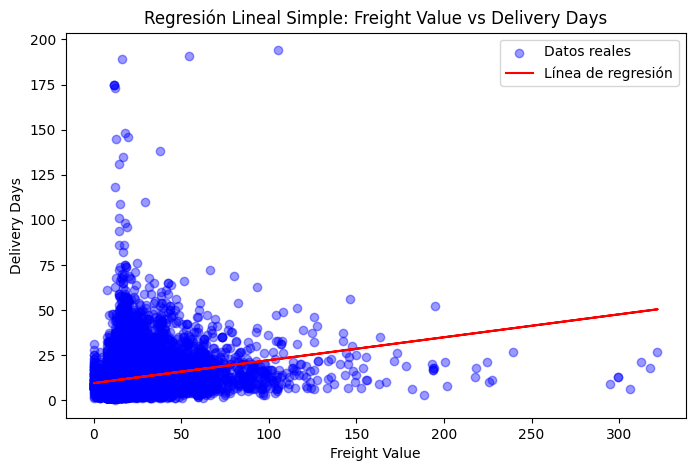

In [219]:
# Por ultimo tocara generar la regresion lineal simple

# 1. Definir variable independiente (X) y dependiente (y)
X = reg_data[['freight_value']]  # Variable predictora
y = reg_data['delivery_days']    # Variable objetivo

# 2. Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo
model_lr_simple = LinearRegression()
model_lr_simple.fit(X_train, y_train)

# 4. Hacer predicciones
y_pred = model_lr_simple.predict(X_test)

# 5. Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Resultados Regresión Lineal Simple (freight_value ➜ delivery_days):")
print(f"MAE  = {mae:.2f} días")
print(f"RMSE = {rmse:.2f} días")
print(f"R²   = {r2:.4f}")

# dibujo 
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Freight Value')
plt.ylabel('Delivery Days')
plt.title('Regresión Lineal Simple: Freight Value vs Delivery Days')
plt.legend()
plt.show()

Conclusión RL1


El modelo no es bueno para predecir delivery_days usando solo freight_value.

Esto era esperable, ya que el tiempo de entrega depende de muchos más factores (distancia, logística, tipo de producto, estado, etc.).

Esta regresión sirve como un baseline inicial para comparar con modelos más complejos.

### Regresion lineal múltiples 


Al poder evaluar los valores de los resultados de la regresión pasada podemos evaluar que quedo bastante pobre de manera que si integramos mas variables independientes es posible que tengamos mejores resultados y evaluar tambien que afecta al los dias de entrega

In [220]:
# Selección de variables
features = ['freight_value', 'distance', 'price', 'product_weight_g', 
            'payment_installments', 'payment_type', 
            'product_category_name', 'customer_state', 'seller_state']

X = datar1[features]
y = datar1['delivery_days']

# Eliminamos registros con nulos en estas columnas
data_multi = pd.concat([X, y], axis=1).dropna()
X = data_multi[features]
y = data_multi['delivery_days']

# One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['payment_type', 'product_category_name', 'customer_state', 'seller_state'], drop_first=True)

# Dividir en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [221]:
# entrenar el modelo de regresion multiple 
# Crear y entrenar el modelo
model_lr_multi = LinearRegression()
model_lr_multi.fit(X_train, y_train)

# Predicciones
y_pred_multi = model_lr_multi.predict(X_test)

# Evaluación
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Resultados Regresión Lineal Múltiple:")
print(f"MAE  = {mae_multi:.2f} días")
print(f"RMSE = {rmse_multi:.2f} días")
print(f"R²   = {r2_multi:.4f}")


Resultados Regresión Lineal Múltiple:
MAE  = 5.28 días
RMSE = 8.37 días
R²   = 0.2215


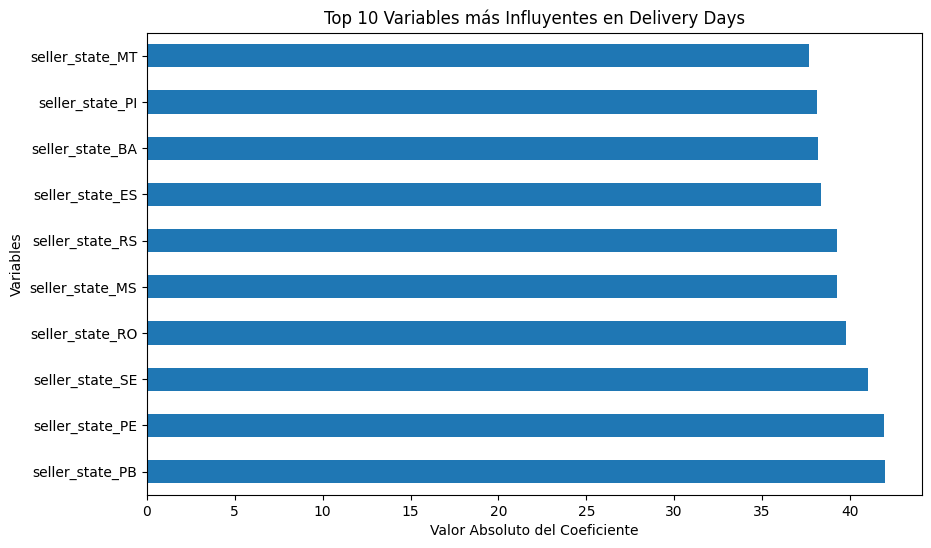

In [222]:
# visualizacion de regresion multiple (coeficientes)

# Extraer los coeficientes del modelo
coeficientes = pd.Series(model_lr_multi.coef_, index=X_encoded.columns)

# Seleccionar los 10 coeficientes más influyentes (por valor absoluto)
coef_importantes = coeficientes.abs().sort_values(ascending=False).head(10)

# Graficar
plt.figure(figsize=(10,6))
coef_importantes.plot(kind='barh')
plt.title('Top 10 Variables más Influyentes en Delivery Days')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.ylabel('Variables')
plt.show()


### Conclusiones

Gracias a esta regresion lineal multiple podemos evaluar como Antes teníamos un R² de 0.0462, ahora subimos a 0.2215 Esto indica que ahora el modelo explica mejor variabilidad en los tiempos de entrega.

Y gracias a la grafica podemos ver que las variables mas "impactantes" son los estados donde se encuentran los vendedores ua que tienen un impacto significativo en los tiempos de entrega.

### IMPLEMENTACION DE REGRESION KNN

In [223]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [224]:


# Crear el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)

# Predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluación
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"Resultados KNN Regression:")
print(f"MAE  = {mae_knn:.2f} días")
print(f"RMSE = {rmse_knn:.2f} días")
print(f"R²   = {r2_knn:.4f}")


Resultados KNN Regression:
MAE  = 5.33 días
RMSE = 8.64 días
R²   = 0.1719


Al ser variables tan dispersas podemos ver que la regresion lineal multiple nos favorecio mas con el acercamiento del resultado esperado, no obstante podemos ver que tiene cierta relacion incluso viendo el MAE que esta cercano 


### Implementacion de regresion SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 🔹 1. Aplicar muestreo al set de entrenamiento
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=5000, random_state=42)

# 🔹 2. Crear el modelo SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train_sample, y_train_sample)

# 🔹 3. Predicciones (usamos el test completo para evaluar)
y_pred_svr = svr_model.predict(X_test)

# 🔹 4. Evaluación
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Resultados SVR (con muestreo de 5000 registros):")
print(f"MAE  = {mae_svr:.2f} días")
print(f"RMSE = {rmse_svr:.2f} días")
print(f"R²   = {r2_svr:.4f}")


## Proceso de ajuste de parámetros